- **Purpose:** To follow the chapter 4
- **Date:** July 25, 2025

# 1. Data and library

In [2]:
# Install and load libraries
library(readr)
library(tidyverse)

install.packages("reticulate")
library(reticulate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.1.0
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’




In [5]:
# Kagglehub
py_require("kagglehub")
kgh <- import("kagglehub") # import the kagglehub pacakge

In [10]:
# Dataset download and read
path <- kgh$dataset_download("ashydv/advertising-dataset")
advert_df <- read_csv(paste0(path, "/advertising.csv"))
head(advert_df)

Rows: 200 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): TV, Radio, Newspaper, Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TV,Radio,Newspaper,Sales
<dbl>,<dbl>,<dbl>,<dbl>
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2


# 1. EDA

In [12]:
# Dimension of the dataframe
dim(advert_df)

[1] 200   4

In [13]:
# Column names
colnames(advert_df)

[1] "TV"        "Radio"     "Newspaper" "Sales"

In [11]:
# Summary of the advertising dataframe
summary(advert_df)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

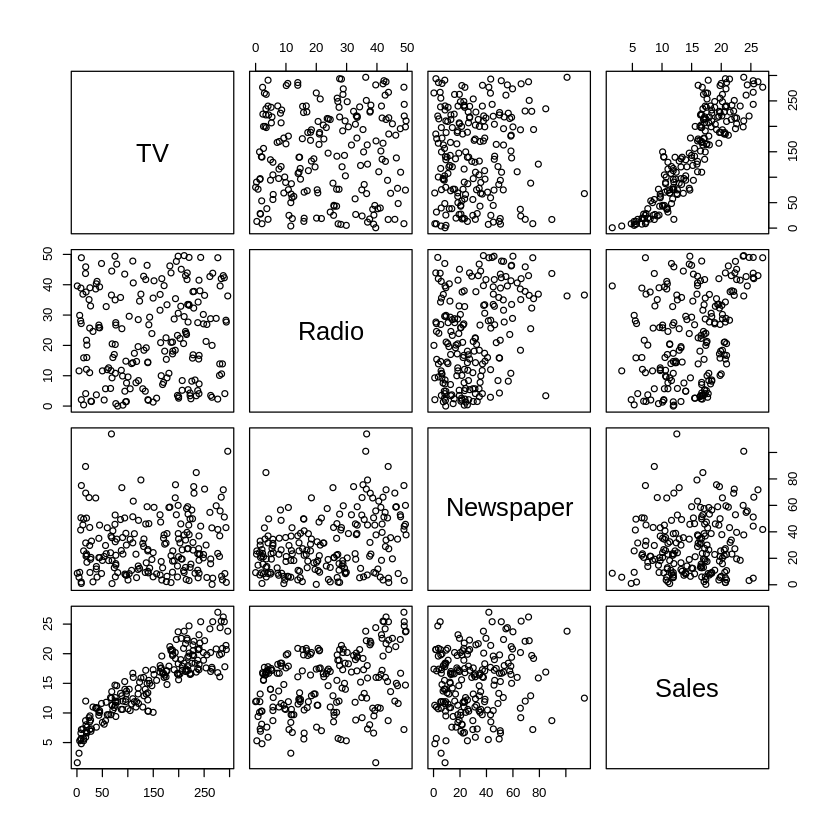

In [14]:
# Plotting
plot(advert_df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘S7’




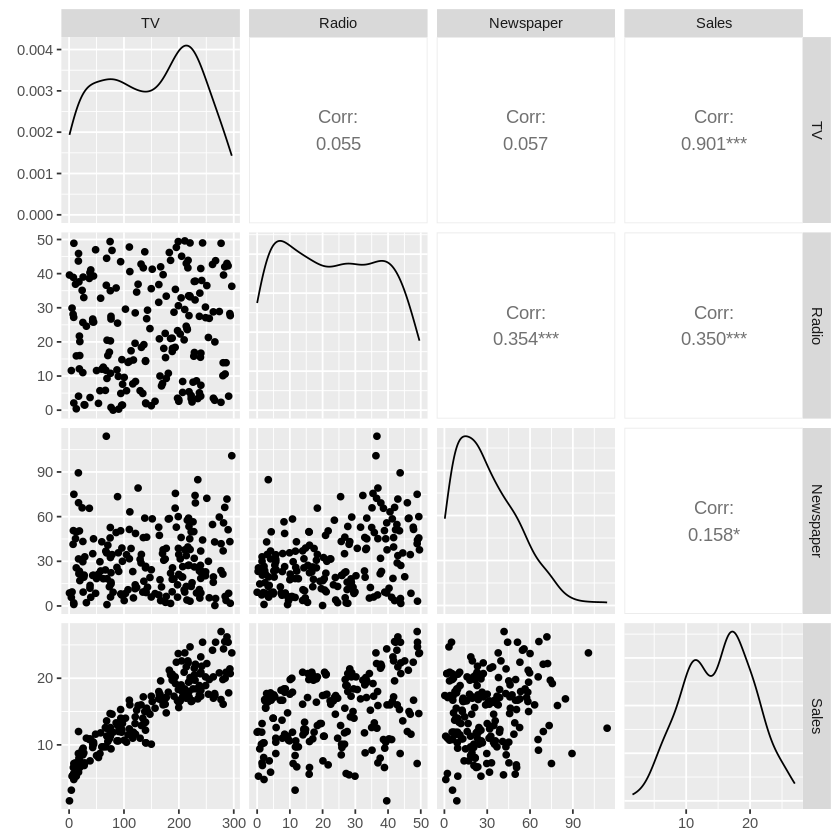

In [16]:
# pair plots
install.packages("GGally")
library(GGally)
ggpairs(advert_df, progress=FALSE)

In [18]:
# Install and load ggpubr
install.packages("ggpubr")
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


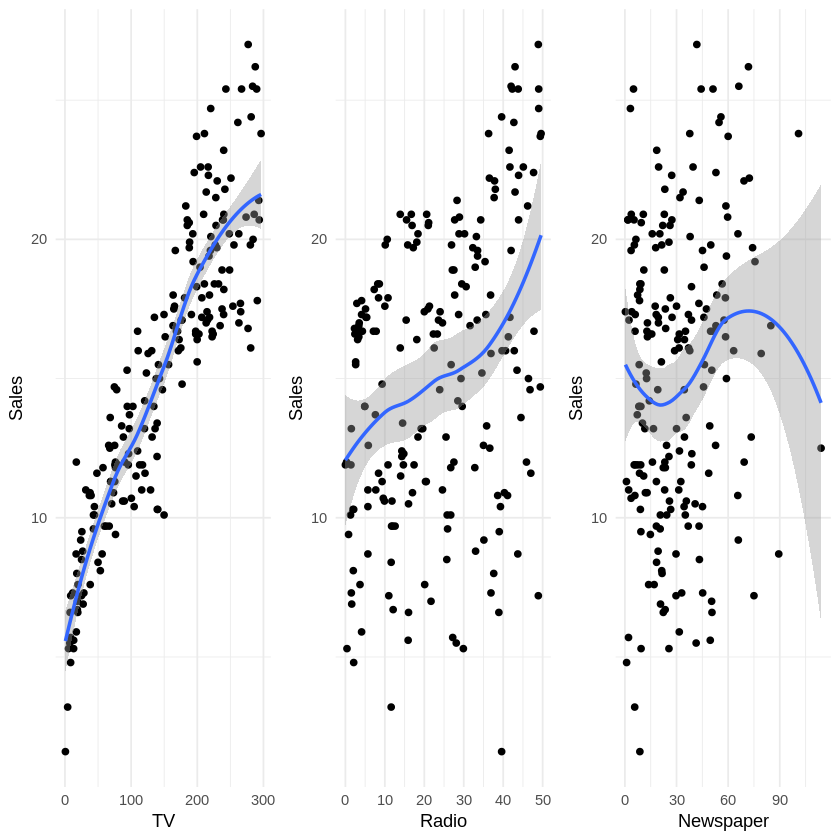

In [19]:
# Visualize the correlations
tvplt <- advert_df |>
  ggplot(aes(x=TV, y=Sales)) +
  geom_point() +
  geom_smooth() +
  theme_minimal()

radplt <- advert_df |>
  ggplot(aes(x=Radio, y=Sales)) +
  geom_point() +
  geom_smooth() +
  theme_minimal()

nwsplt <- advert_df |>
  ggplot(aes(x=Newspaper, y=Sales)) +
  geom_point() +
  geom_smooth() +
  theme_minimal()

# Combine the plots
ggarrange(tvplt, radplt, nwsplt, ncol=3)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


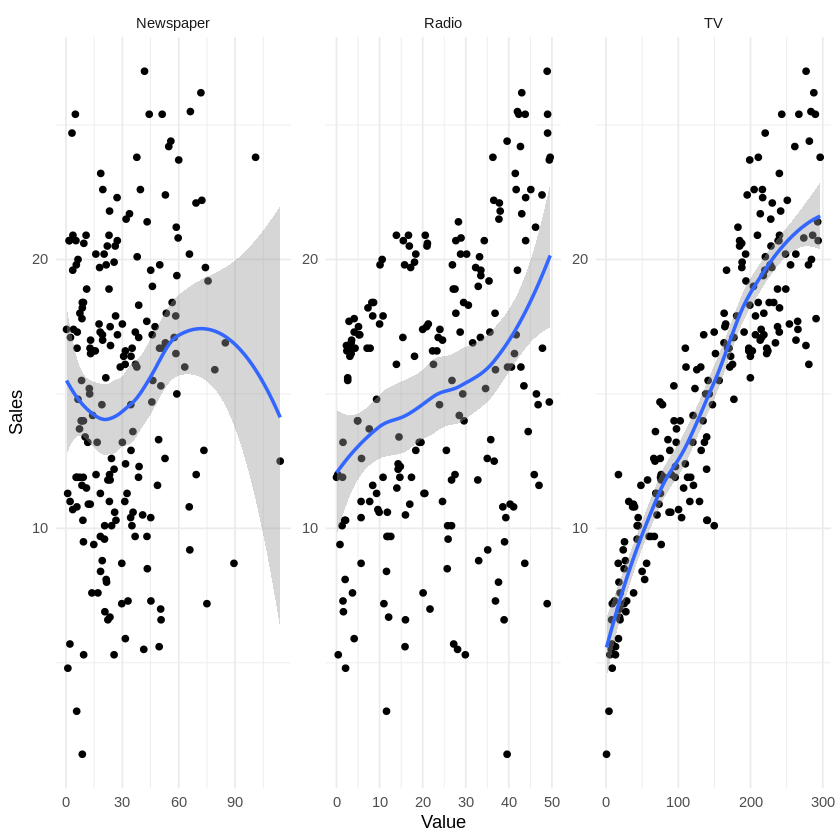

In [28]:
# Easier method to combine the plots
advert_df |>
  gather(key="Medium", value="Value", -Sales) |>
  ggplot(aes(x=Value, y=Sales)) +
  geom_point() +
  geom_smooth() +
  theme_minimal() +
  facet_wrap(~Medium, scales="free")

# 2. Simple regression

In [29]:
# Simple linear regression between
lin_reg <- lm(Sales ~ TV, data=advert_df)
summary(lin_reg)


Call:
lm(formula = Sales ~ TV, data = advert_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
TV          0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


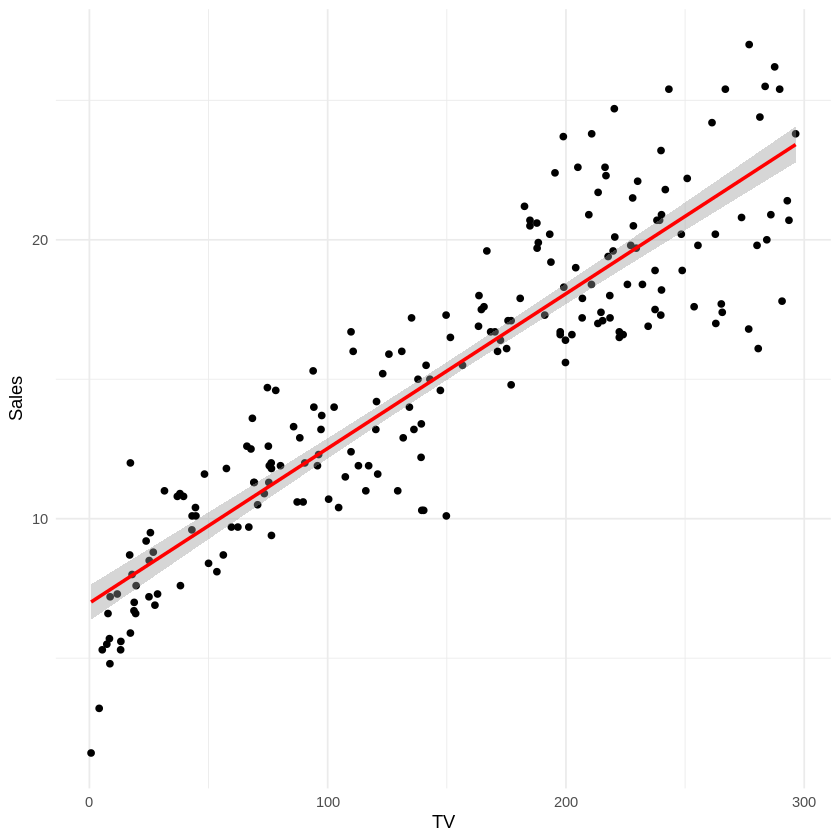

In [33]:
# Visualize the model
lin_reg |>
  ggplot(aes(TV, Sales)) +
  geom_point() +
  geom_smooth(method="lm", color="red") +
  theme_minimal()

In [34]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.6.1      GGally_2.3.0      reticulate_1.43.0 lubridate_1.9.4  
 [5] forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4       purrr_1.1.0      
 [9] tidyr_1.3.1       ti